Работа с датасетом MovieLens

https://grouplens.org/datasets/movielens/

См книгу 
Python for Data Analysis, Wes McKinney
2. Introductory Examples, MovieLens 1M Data Set (стр. 26)

1. Оценить количество фильмов, пользователей и оценок
2. Оценить распределения (предлагается построить распределения количества оценок по фильмам и пользователям и увидеть т.н. "длинные хвосты" в распределениях)
3. Оценить средние оценки по фильмам и по пользователям
4. Выбрать критерий, показывающий, что фильм нравится всем, или не нравится никому, и вывести топ фильмов из этих списков. Знаете ли вы эти фильмы, согласны ли с оценками?
5. Выбрать лучшие фильмы
6. Посмотреть на смещение оценок, увидеть сколько пользователей занижают оценки и завышают оценки.
7. Построить рекомендательную систему с помощью библиотеки surprise (или другой, по желанию). Применить подбор параметров модели на сетке, оценить качество полученной модели по выбранной вами метрике. 
8. Получить рекомендации для нового пользователя, совпадают ли они с лучшими фильмами?
9. Поставьте оценку какому-нибудь фильму (который вы знаете и можете поставить оценку) и получите рекомендации, насколько они качественные по вашим ощущениям? Сделайте это для фильма с негативной оценкой и для фильма с позитивной оценкой.
10. Добавляйте оценки и посмотрите, как изменяются рекомендации фильмов. Соответствуют ли они вашим предпочтениям? Есть ли недостатки у системы? Сколько нужно оценок для того, чтобы рекомендации стали релевантными? (в этом пункте добавляйте оценки в том числе из интересного вам жанра для пункта 11)
11. Построить рекомендательную систему по подвыборке - выбрать интересный вам жанр. Изменились ли рекомендации? Стали лучше\хуже?
12(*). сделать самостоятельное исследование и выяснить, как добавить нового пользователя\фильм в систему без переобучения всей модели, описать архитектуру такого решения


In [1]:
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
rating = pd.read_csv('ml-latest-small/ratings.csv')

In [3]:
rating.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [4]:
movie = pd.read_csv('ml-latest-small/movies.csv')

In [5]:
movie.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# 1. Оценить количество фильмов, пользователей и оценок

In [7]:
rating.shape

(100836, 4)

В анализе принято оценок - 100836

Количество пользователей

In [8]:
rating['userId'].nunique()

610

Количество фильмов


In [9]:
rating['movieId'].nunique() 

9724

# 2. Оценить распределения (предлагается построить распределения количества оценок по фильмам и пользователям и увидеть т.н. "длинные хвосты" в распределениях)


In [10]:
userId = rating['userId']

In [11]:
count_user = userId.value_counts()

основная часть ставит немного оценок

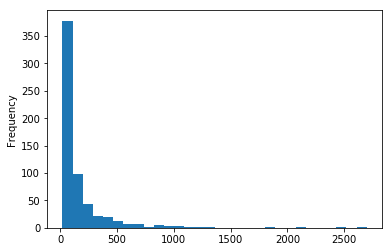

In [12]:
count_user.plot.hist(bins=30)

Аналогично с фильмами

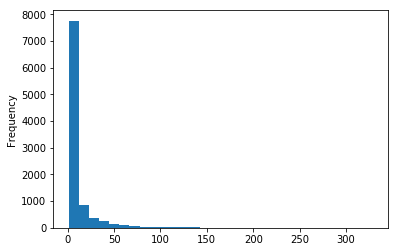

In [13]:
movieId = rating['movieId']
count_movie = movieId.value_counts()
count_movie.plot.hist(bins=30)

# 3. Оценить средние оценки по фильмам и по пользователям

Средние оценки по пользователям

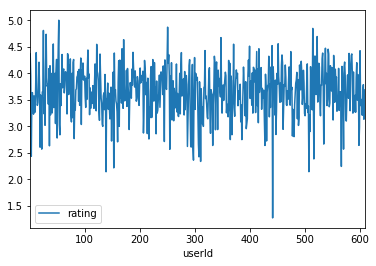

In [14]:
#df.groupby('A').mean()
#userId movieId rating timestamp
#rating['userId','rating'].groupby('userId').mean()
rating[['userId', 'rating']].groupby('userId').mean().plot()

In [15]:
#df.groupby('A').mean()
#userId movieId rating timestamp
#rating['userId','rating'].groupby('userId').mean()
rating[['movieId', 'rating']].groupby('movieId').mean()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
6,3.946078
7,3.185185
8,2.875000
9,3.125000


# 4. Выбрать критерий, показывающий, что фильм нравится всем, или не нравится никому, и вывести топ фильмов из этих списков. Знаете ли вы эти фильмы, согласны ли с оценками?


Формула для рейтинга: (Средний рейтинг фильма)*(Количество отзывов фильма)

Рассчитаем средний рейтинг

In [16]:
average_rating = rating.groupby(['movieId']).mean().reset_index()

In [17]:
average_rating.head(5)

,movieId,userId,rating,timestamp
0,1,306.530233,3.920930,1.129835e+09
1,2,329.554545,3.431818,1.135805e+09
2,3,283.596154,3.259615,1.005110e+09
3,4,219.857143,2.357143,8.985789e+08
4,5,299.571429,3.071429,9.926643e+08


Количество отзывов:

In [18]:
count_rating = rating.groupby(['movieId']).size().reset_index(name='counts')
count_rating.rename(columns={'movieId':'movieId_'}, inplace=True)

In [19]:
rating_concat = pd.concat([average_rating, count_rating], axis=1) 
rating_concat = rating_concat.drop("movieId_", axis=1)

In [20]:
rating_concat.head(5)

,movieId,userId,rating,timestamp,counts
0,1,306.530233,3.920930,1.129835e+09,215
1,2,329.554545,3.431818,1.135805e+09,110
2,3,283.596154,3.259615,1.005110e+09,52
3,4,219.857143,2.357143,8.985789e+08,7
4,5,299.571429,3.071429,9.926643e+08,49


In [21]:
rating_concat['ave_rating'] =  rating_concat['rating']*rating_concat['counts']
top10 = rating_concat.sort_values(by='ave_rating', ascending=False)[:10]

In [22]:
top10

,movieId,userId,rating,timestamp,counts,ave_rating
277,318,302.299685,4.429022,1.189037e+09,317,1404.0
314,356,308.161094,4.164134,1.173755e+09,329,1370.0
257,296,295.182410,4.197068,1.137473e+09,307,1288.5
1938,2571,306.604317,4.192446,1.259964e+09,278,1165.5
510,593,306.577061,4.161290,1.147081e+09,279,1161.0
224,260,304.717131,4.231076,1.189281e+09,251,1062.0
97,110,309.599156,4.031646,1.094719e+09,237,955.5
2224,2959,319.894495,4.272936,1.294796e+09,218,931.5
461,527,315.822727,4.225000,1.171564e+09,220,929.5
418,480,311.197479,3.750000,1.083516e+09,238,892.5


In [23]:
top10 = pd.merge(top10, movie, on='movieId')

## 5. Выбрать лучшие фильмы

In [24]:
top10[['ave_rating', 'title']]

,ave_rating,title
0,1404.0,"Shawshank Redemption, The (1994)"
1,1370.0,Forrest Gump (1994)
2,1288.5,Pulp Fiction (1994)
3,1165.5,"Matrix, The (1999)"
4,1161.0,"Silence of the Lambs, The (1991)"
5,1062.0,Star Wars: Episode IV - A New Hope (1977)
6,955.5,Braveheart (1995)
7,931.5,Fight Club (1999)
8,929.5,Schindler's List (1993)
9,892.5,Jurassic Park (1993)


## 6. Посмотреть на смещение оценок, увидеть сколько пользователей занижают оценки и завышают оценки.


## 7. Построить рекомендательную систему с помощью библиотеки surprise (или другой, по желанию). Применить подбор параметров модели на сетке, оценить качество полученной модели по выбранной вами метрике. 


In [25]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise.model_selection import GridSearchCV

In [26]:
data3 = Dataset.load_builtin('ml-100k')

In [27]:
rating.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [28]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.005, 0.008, 0.1],
              'n_factors': [5, 10, 100, 500],
              'reg_all': [0.1, 0.2, 0.3, 0.4, 0.5]}

gridsearch = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gridsearch.fit(data)

print(gridsearch.best_score['rmse'])
print(gridsearch.best_params['rmse'])


#cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

0.872737868221301
{'n_epochs': 15, 'lr_all': 0.008, 'n_factors': 100, 'reg_all': 0.1}


## 8. Получить рекомендации для нового пользователя, совпадают ли они с лучшими фильмами?


## 9. Поставьте оценку какому-нибудь фильму (который вы знаете и можете поставить оценку) и получите рекомендации, насколько они качественные по вашим ощущениям? Сделайте это для фильма с негативной оценкой и для фильма с позитивной оценкой.
## 10. Добавляйте оценки и посмотрите, как изменяются рекомендации фильмов. Соответствуют ли они вашим предпочтениям? Есть ли недостатки у системы? Сколько нужно оценок для того, чтобы рекомендации стали релевантными? (в этом пункте добавляйте оценки в том числе из интересного вам жанра для пункта 11)


## 11. Построить рекомендательную систему по подвыборке - выбрать интересный вам жанр. Изменились ли рекомендации? Стали лучше\хуже?
